# Análisis de superpivivientes del Titanic

## Cargar librerias necesarias

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos en Python

In [126]:
datos= pd.read_csv('titanic.csv')

## Revisión del Dataset

In [129]:
# Revisión inicial de los datos

datos.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
# Dimensiones del DF

datos.shape

(891, 12)

In [133]:
# Información general sobre los datos

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [135]:
# Estadísticas descriptivas

datos.describe().round(0)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.0,2.0,30.0,1.0,0.0,32.0
std,257.0,0.0,1.0,15.0,1.0,1.0,50.0
min,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,224.0,0.0,2.0,20.0,0.0,0.0,8.0
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.0
75%,668.0,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.0


In [137]:
# Revisión de valores nulos

nulo= datos.isnull().sum().sort_values(ascending = False)

nulo

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [139]:
# Sumatorio de valores no nulos

nonulo= datos.notnull().sum().sort_values(ascending = False)

nonulo

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       889
Age            714
Cabin          204
dtype: int64

In [141]:
# Conocer el porcentaje de valores nulos por cada columna

porcentaje_nulo= (datos.isnull().sum() / datos.isnull().count()).sort_values(ascending = False).round(3)

porcentaje_nulo

Cabin          0.771
Age            0.199
Embarked       0.002
PassengerId    0.000
Survived       0.000
Pclass         0.000
Name           0.000
Sex            0.000
SibSp          0.000
Parch          0.000
Ticket         0.000
Fare           0.000
dtype: float64

In [143]:
# Visión completa de los valores nulos en el dataset

nulo_completo= pd.concat([nulo, porcentaje_nulo], axis=1, keys= ['Datos nulos', ' Porcentaje de nulos'])
nulo_completo

,Datos nulos,Porcentaje de nulos
Cabin,687,0.771
Age,177,0.199
Embarked,2,0.002
PassengerId,0,0.000
Survived,0,0.000
Pclass,0,0.000
Name,0,0.000
Sex,0,0.000
SibSp,0,0.000
Parch,0,0.000


## Análisis del Dataset

El **dataset** contiene un total de **418 registros (filas)** y **12 columnas**. 

#### Tipos de Datos:
- **2 columnas** con tipo de datos `float64`:
  - `Age`
  - `Fare`
  
- **5 columnas** con tipo de datos `int64` (numéricas):
  - `PassengerId`
  - `Survived`
  - `Pclass`
  - `SibSp`
  - `Parch`
  
- **5 columnas** con tipo de datos `object` (categóricas):
  - `Name`
  - `Sex`
  - `Ticket`
  - `Cabin`
  - `Embarked`

#### Descripción de las Columnas:

| **Columna**    | **Descripción**                                                                                      |
|----------------|------------------------------------------------------------------------------------------------------|
| **PassengerId**| Identificador único para cada pasajero.                                                             |
| **Survived**   | `0` significa que el pasajero **no sobrevivió** y `1` significa que **sobrevivió**.                  |
| **Pclass**     | Clase del pasajero: 1, 2 o 3.                                                                        |
| **Name**       | Nombre del pasajero.                                                                                 |
| **Sex**        | Género del pasajero: `male` o `female`.                                                               |
| **Age**        | Edad del pasajero, variable numérica.                                                                |
| **SibSp**      | Número de hermanos o esposas a bordo. Variable numérica.                                              |
| **Parch**      | Número de padres o hijos a bordo. Variable numérica.                                                 |
| **Ticket**     | Número de billete.                                                                                  |
| **Fare**       | Tarifa del billete. Variable numérica.                                                              |
| **Cabin**      | Número de camarote.                                                                                 |
| **Embarked**   | Puerto de embarque del pasajero: `C` = Cherbourg; `Q` = Queenstown; `S` = Southampton.                                           |

#### Resumen de valores nulos:
- **Age**: 177 valores nulos.
- **Embarked**: 2 valores nulo.
- **Cabin**: 687 valores nulos.

## Consideraciones después del Análisis de dataset

- **Age:** imputar con la mediana de `Age`.
- **Embarked:** imputar con la moda de `Embarked`.
- **Cabin:** eliminar la esta columna ya que el 70% son valores nulos.

In [149]:
# Imputar 'Age' y 'Fare' con la mediana

datos['Age'] = datos['Age'].fillna(datos['Age'].median())
datos['Embarked'] = datos['Embarked'].fillna(datos['Embarked'].mode()[0])

In [151]:
# Comprobación si han sido modificados los nulos

datos.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [153]:
# Quitar la columna `Cabin'

datos.drop('Cabin', axis=1, inplace= True)

In [155]:
# Comprobación de que la columna ha sido eliminada

datos.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

## Análisis y creación de visualizaciones de los datos

### Pasajeros según Clase

In [161]:
# Obtención de los pasajeros totales según Clase

primera_clase = (datos['Pclass'] == 1).sum()
segunda_clase = (datos['Pclass'] == 2).sum()
tercera_clase = (datos['Pclass'] == 3).sum()

print('Total de pasajeros en Primera Clase:', primera_clase)
print('Total de pasajeros en Segunda Clase:', segunda_clase)
print('Total de pasajeros en Tercera Clase:', tercera_clase)

Total de pasajeros en Primera Clase: 216
Total de pasajeros en Segunda Clase: 184
Total de pasajeros en Tercera Clase: 491


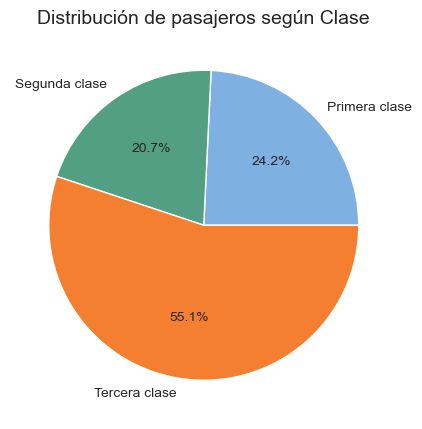

In [163]:
# Creación del Gráfico de Tarta


plt.figure(figsize=(5,6))
colores= ['#7eb1e2', '#529f83', '#f47f30']

labels=['Primera clase', 'Segunda clase', 'Tercera clase']
sizes= [primera_clase, segunda_clase, tercera_clase]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colores)
plt.title('Distribución de pasajeros según Clase', fontsize=14)

# Visualización del gráfico

plt.show()


### Supervivientes según Clase

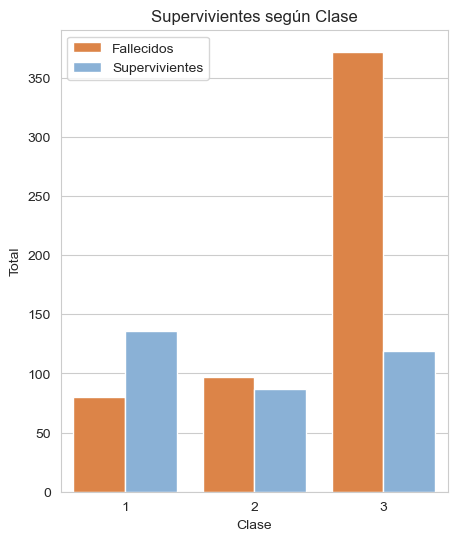

In [166]:
# Creación del Gráfico con Seaborn de Countplot

plt.figure(figsize=(5,6))
sns.set_style("whitegrid")
colores = ['#f47f30', '#7eb1e2'] 

# Creación del gráfico de barras
sns.countplot(x ='Pclass', hue ='Survived', data=datos, palette= colores)

# Creación de títulos
plt.title('Supervivientes según Clase')
plt.xlabel('Clase')
plt.ylabel('Total')
plt.legend(['Fallecidos', 'Supervivientes'])

# Visualización del gráfico
plt.show()


Como se puede observar, la clase con mayor número de fallecidos fue la Tercera Clase, con una cifra que casi triplica a la de la Primera y Segunda Clase. En contraste, la Primera Clase fue la que registró el mayor número de supervivientes.

### Superviviencia según Género y Clase

In [170]:
# Creación de un dataframe para visualizar mejor los datos antes de graficarlos.
# 0 significa que el pasajero no sobrevivió y 1 significa que sobrevivió.

pd.crosstab(index=[datos['Sex'], datos['Survived']],
            columns=datos['Pclass'], 
            margins=True).style.background_gradient(cmap='PuBu')


### Gráficos de Supervivencia por Clase y Sexo de los Pasajeros

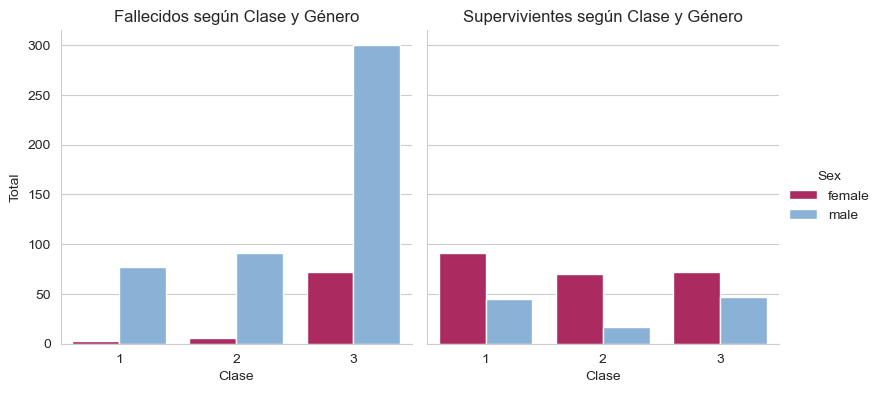

In [173]:
# Creación de los gráficos

# Estilo y colores
sns.set_style("whitegrid")
colores = ['#c1145c', '#7eb1e2']

# Gráfico con catplot
graficobarras = sns.catplot(x='Pclass', hue='Sex', col='Survived', data=datos, kind='count', palette=colores, height=4, aspect=1)

# Ejes y títulos
graficobarras.set_axis_labels("Clase", "Total")
graficobarras.set_titles(col_template="{col_name}")

# Títulos personalizados para cada columna
for ax, title in zip(graficobarras.axes.flat, ["Fallecidos según Clase y Género", "Supervivientes según Clase y Género"]):
    ax.set_title(title)

# Mostrar gráfico
plt.show()


En ambos gráficos se aprecia claramente que las mujeres presentan una tasa de supervivencia considerablemente mayor en todas las clases sociales. Esta diferencia es especialmente marcada si se compara con los hombres, lo que sugiere que el género fue un factor determinante en las probabilidades de sobrevivir al naufragio, independientemente de la clase del pasajero.

#### ¿Qué proporciones de supervivientes hubo con respecto al total de pasajeros?

In [177]:
# Total de pasajeros
total_pasajeros = len(datos)

# Total de pasajeros que sobrevivieron
total_supervivientes = datos['Survived'].sum()

# Porcentaje
porcentaje_supervivientes = (total_supervivientes / total_pasajeros) * 100

# Mostrar resultado redondeado
print(f"Porcentaje de pasajeros que sobrevivieron: {porcentaje_supervivientes:.2f}%")


Porcentaje de pasajeros que sobrevivieron: 38.38%


#### ¿Qué porcentaje de los supervivientes fueron hombres y mujeres respecto al total de pasajeros?

In [180]:
# Calculamos el porcentaje de supervivientes por género
supervivencia_genero = datos.groupby('Sex')['Survived'].mean() * 100

# Extraemos los valores
mujeres = supervivencia_genero['female']
hombres = supervivencia_genero['male']

# Creación del texto 
print(f"El {mujeres:.2f}% de las mujeres sobrevivieron al naufragio, mientras que solo el {hombres:.2f}% de los hombres lo hizo.")




El 74.20% de las mujeres sobrevivieron al naufragio, mientras que solo el 18.89% de los hombres lo hizo.


### Análisis según Género

In [183]:
# Conteo de hombres y mujeres

datos['Sex'].value_counts().to_frame(name='Total').style.background_gradient(cmap='PuBu')


,Total
Sex,
male,577
female,314


#### Gráfico de barras según género de los pasajeros

/var/folders/0y/cnjyxcjx7jq1btnpkh4fnd280000gn/T/ipykernel_39515/3378294241.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=datos, palette=colores)


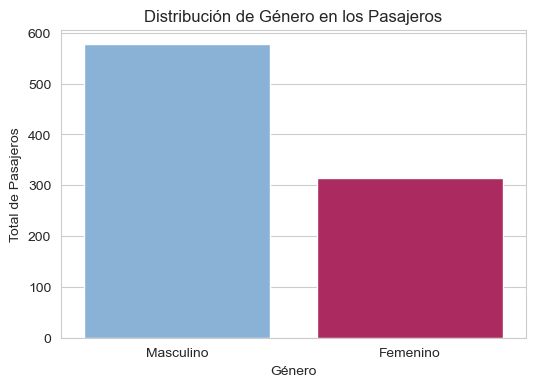

In [186]:
# Creación de la visualización

# Estilo y colores
sns.set_style("whitegrid")
colores = ['#7eb1e2','#c1145c']

# Gráfico con countplot
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=datos, palette=colores)

# Creación de títulos
plt.title('Distribución de Género en los Pasajeros')
plt.xlabel('Género')
plt.ylabel('Total de Pasajeros')

# Mostrar gráfico
plt.xticks(ticks=[0, 1], labels=['Masculino', 'Femenino'])
plt.show()

#### Gráfico de barras apiladas que muestra por género si sobrevivio o no




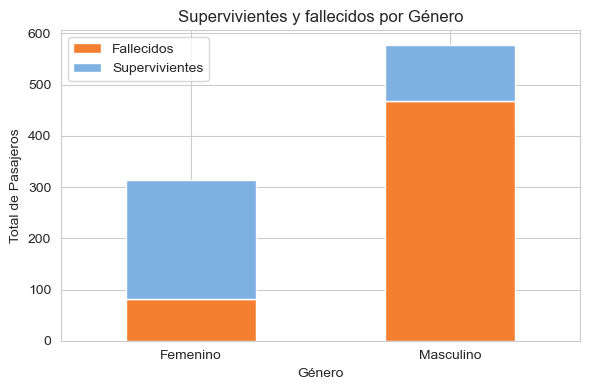

In [189]:
#Creación del gráfico

# Agrupamos los datos por género y supervivencia
genero_supervivencia = datos.groupby(['Sex', 'Survived']).size().unstack()

# Colores:
colores = ['#f47f30', '#7eb1e2']  

# Crear gráfico de barras apiladas
genero_supervivencia.plot(kind='bar', stacked=True, color=colores, figsize=(6, 4))

# Títulos y etiquetas
plt.title('Supervivientes y fallecidos por Género')
plt.xlabel('Género')
plt.ylabel('Total de Pasajeros')
plt.legend(['Fallecidos', 'Supervivientes'])
plt.xticks(rotation=0, ticks=[0, 1], labels=['Femenino','Masculino'])

# Mostrar gráfico
plt.tight_layout()
plt.show()


### Análisis según la Edad de los pasajeros

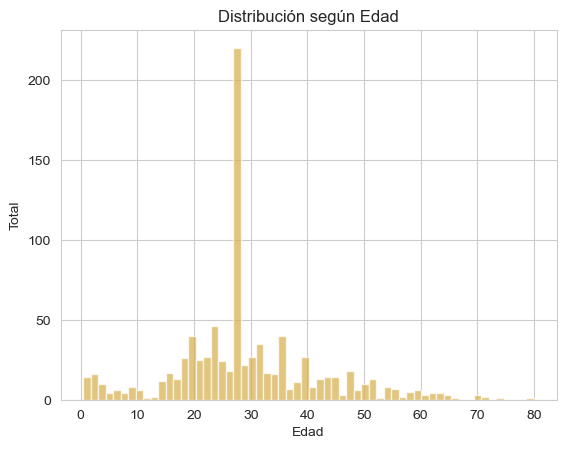

In [192]:
# Creación de la visualización

datos.hist(column='Age', bins = 60, color = "#d7ad48", alpha = 0.7)

# Agregamos los titulos del gráfico
plt.title('Distribución según Edad')
plt.xlabel ('Edad')
plt.ylabel('Total')

# Visualización del gráfico
plt.show()

In [194]:
# Edad mínima

min= datos.Age.min()

# Edad máxima

max= datos.Age.max()

# Edad média

media= datos.Age.mean().round(2)

print(f'La edad mínima de los pasajeros es {min}, la edad máxima es {max}  y la edad media es {media}.')

La edad mínima de los pasajeros es 0.42, la edad máxima es 80.0  y la edad media es 29.36.


In [196]:
# Crear columnas para clasificar como 'Mayor de edad' o 'Menor de edad'

datos['Edad categoria'] = datos['Age'].apply(lambda x: 'Mayor de edad' if x >= 18 else 'Menor de edad' if pd.notnull(x) else 'Desconocido')

# Crear tabla cruzada
tabla_edad = pd.crosstab(index= datos['Edad categoria'], columns='Total', margins=False)

# Aplicar estilo
tabla_edad.style.background_gradient(cmap='PuBu')


col_0,Total
Edad categoria,
Mayor de edad,778
Menor de edad,113


#### ¿Qué porcentaje de menores de edad sobrevivieron según su género?

In [199]:
# Filtramos solo los menores de edad
menores = datos[datos['Age'] < 18]

# Calculamos la tasa de supervivencia por género dentro de los menores
supervivencia_menores = menores.groupby('Sex')['Survived'].mean() * 100

# Extraemos los valores
porcentaje_menores_mujeres = supervivencia_menores.get('female', 0)
porcentaje_menores_hombres = supervivencia_menores.get('male', 0)

# Mostramos el resultado en texto
print(f"Entre los menores de edad, sobrevivieron el {porcentaje_menores_mujeres:.2f}% de las niñas y el {porcentaje_menores_hombres:.2f}% de los niños.")



Entre los menores de edad, sobrevivieron el 69.09% de las niñas y el 39.66% de los niños.


### Gráfico de distribución de fallecidos y supervivientes según edad

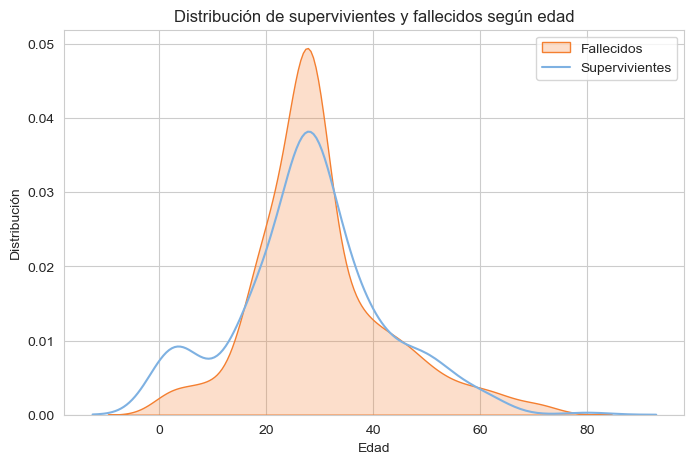

In [202]:
# Creación del gráfico

plt.figure(figsize=(8,5))

axs = sns.kdeplot(datos.Age[datos.Survived == 0], fill = True, color = '#f47f30', label = 'Fallecido')
axs = sns.kdeplot(datos.Age[datos.Survived == 1], color = '#7eb1e2', label = 'Supervivientes')

# Titulos del gráfico
plt.title('Distribución de supervivientes y fallecidos según edad')
plt.xlabel('Edad')
plt.ylabel('Distribución')
plt.legend({'Fallecidos', 'Supervivientes'})

# Mostramos el gráfico
plt.show()


#### Clasificación de los pasajeros según su rango de edad

##### Teniendo en cuenta las siguientes consideraciones:
###### - La esperanza de vida era más baja (~50 años).
###### - Se viajaba mucho en familia, con presencia notable de niños.
###### - Había una clara distinción entre niños, jóvenes adultos, adultos y ancianos.

##### He creado la siguiente clasificación según rango de edad de los pasajeros:
###### Niño (0-12)
###### Adolescente (13-19)
###### Joven Adulto (20-35)
###### Adulto (36-50)
###### Mayor (51+)

###### 

In [205]:
# Creación de los rangos de edad

datos ['rango_edad'] = 0
datos.loc[ datos['Age'] <= 12, 'rango_edad' ] = 0
datos.loc[ (datos['Age'] > 13) & (datos['Age'] <= 19), 'rango_edad' ] = 1
datos.loc[ (datos['Age'] > 20) & (datos['Age'] <= 35), 'rango_edad' ] = 2
datos.loc[ (datos['Age'] > 36) & (datos['Age'] <= 50), 'rango_edad' ] = 3
datos.loc[ datos['Age'] > 51 ,'rango_edad' ] = 4

datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Edad categoria,rango_edad
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mayor de edad,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mayor de edad,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Mayor de edad,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mayor de edad,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mayor de edad,2


In [207]:
# Crear columnas para clasificar según rango de edad

datos['rango_edad'].value_counts().to_frame().style.background_gradient(cmap='PuBu')


,count
rango_edad,
2,495
3,131
0,115
1,93
4,57


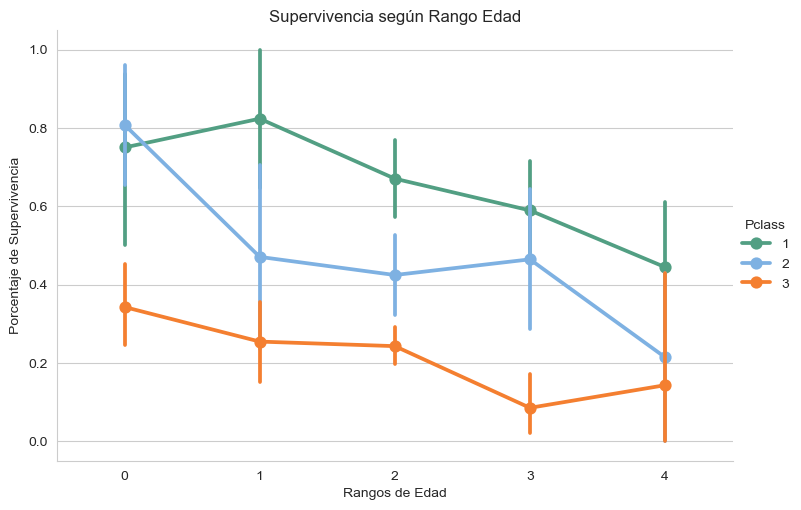

In [209]:
# Definir paleta personalizada para Pclass

colores_clase = {
    1: '#529f83',
    2: '#7eb1e2',
    3: '#f47f30' }

sns.catplot(x ='rango_edad', y ='Survived', data = datos, hue= 'Pclass', kind='point', palette=colores_clase, height=5, aspect=1.5)

# Agregamos los títulos
plt.title('Supervivencia según Rango Edad')
plt.xlabel('Rangos de Edad')
plt.ylabel('Porcentaje de Supervivencia')

# Visualizar el gráfico

plt.show()

In [210]:
# Calcular porcentaje de supervivencia por rango_edad
porcentaje_supervivencia = datos.groupby('rango_edad')['Survived'].mean()

# Convertimos a porcentaje y lo pasamos a un DataFrame
porcentaje_supervivencia = (porcentaje_supervivencia * 100).round(2).to_frame()

# Renombramos la columna para mayor claridad
porcentaje_supervivencia.columns = ['% Supervivencia']

# Visualizar
porcentaje_supervivencia.style.background_gradient(cmap='PuBu')

,% Supervivencia
rango_edad,
0,50.430000
1,39.780000
2,35.760000
3,38.170000
4,35.090000


### Análisis según el coste del billete

In [214]:
# Valor máximo y mínimo del billete

print('El billete más caro:', datos['Fare'].max())
print('El billete más económico:', datos['Fare'].min())

El billete más caro: 512.3292
El billete más económico: 0.0


#### Clasificación de los billetes según el precio y tasa de supervivencia

In [217]:
# Crear una nueva columna con los cuartiles del precio del billete
datos['Rango_Fare'] = pd.qcut(datos['Fare'], 4, labels=["Muy Bajo", "Bajo", "Alto", "Muy Alto"])

# Agrupar por rango y calcular tasa de supervivencia y total de pasajeros
supervivencia_por_billete = datos.groupby('Rango_Fare', observed=False).agg(
    Tasa_Supervivencia=('Survived', 'mean'),
    Total_Pasajeros=('Survived', 'count')
)

# Visualizar con estilo
supervivencia_por_billete.style.background_gradient(cmap='PuBu', subset=['Tasa_Supervivencia'])


,Tasa_Supervivencia,Total_Pasajeros
Rango_Fare,,
Muy Bajo,0.197309,223
Bajo,0.303571,224
Alto,0.454955,222
Muy Alto,0.581081,222


#### Supervivientes con los billetes más caros

In [220]:
superviviente_billete_caro= ((datos['Fare']>500)&(datos['Survived']==1)).sum()
total_pasajeros_billeter_caro= ((datos['Fare']>500)&(datos['Survived'])).sum()
nombre_billete_caro = datos[(datos['Fare'] > 500) & (datos['Survived'] == 1)]['Name'].tolist()

print(f'La cantidad de supervivientes con un billete superior a 500usd es de {superviviente_billete_caro} de un total de {total_pasajeros_billeter_caro}')
print(f'Se llaman: {nombre_billete_caro}')

La cantidad de supervivientes con un billete superior a 500usd es de 3 de un total de 3
Se llaman: ['Ward, Miss. Anna', 'Cardeza, Mr. Thomas Drake Martinez', 'Lesurer, Mr. Gustave J']


### Análisis según la puerto de salida

/var/folders/0y/cnjyxcjx7jq1btnpkh4fnd280000gn/T/ipykernel_39515/1711818362.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=datos, palette=colores)


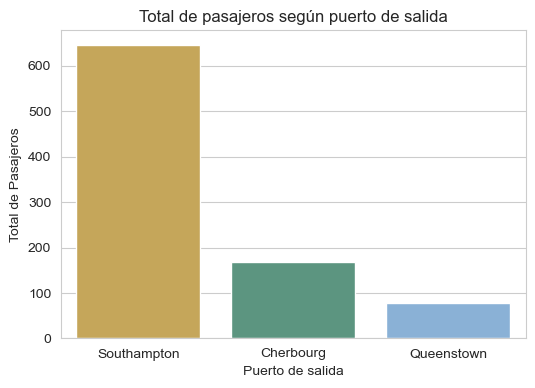

In [65]:
# Creación de la visualización

# Estilo y colores
sns.set_style("whitegrid")
colores = ['#d7ad48', '#529f83', '#7eb1e2']

# Gráfico con countplot
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', data=datos, palette=colores)

# Creación de títulos
plt.title('Total de pasajeros según puerto de salida')
plt.xlabel('Puerto de salida')
plt.ylabel('Total de Pasajeros')
plt.xticks(np.arange(3),['Southampton', 'Cherbourg', 'Queenstown'])

# Mostrar gráfico
plt.show()

#### Supervivientes y fallecidos según su puerto de salida

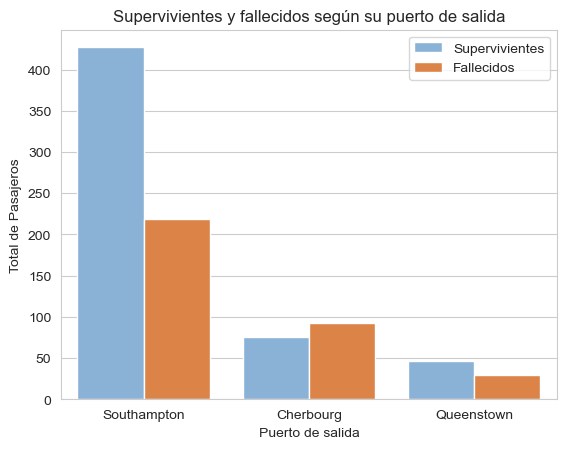

In [67]:
# Gráfico
sns.countplot(data=datos, x='Embarked', hue='Survived', palette=['#7eb1e2', '#f47f30'])

# Títulos y etiquetas
plt.title('Supervivientes y fallecidos según su puerto de salida')
plt.xlabel('Puerto de salida')
plt.ylabel('Total de Pasajeros')

# Renombrar las etiquetas del eje X
plt.xticks([0, 1, 2], ['Southampton', 'Cherbourg', 'Queenstown'])

# Leyenda personalizada
plt.legend(labels=['Supervivientes', 'Fallecidos'])

# Mostrar gráfico
plt.show()
